#### 코드 참조 
[1] https://github.com/rickiepark/machine-learning-with-python-cookbook
[2] https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html 
[3] https://github.com/mikexcohen/LinAlgBook/blob/main/python
[4] https://docs.sympy.org/latest/tutorial/matrices.html
[5] Dr. Jaewook Lee's Lecture Notes

# 4장 고유치와 SVD (Eigenvalues and SVD)

## 4.1. Eigenvalues and eigenvectors

In [17]:
import numpy as np
from scipy.linalg import eig,hankel
import matplotlib.pyplot as plt


In [24]:
A = np.array([[1, 5, 2], [2, 4, 1], [3, 6, 2]])
L, V = np.linalg.eig(A)
L = np.diag(L)
print(L)
print(V)

[[ 7.9579162   0.          0.        ]
 [ 0.         -1.25766471  0.        ]
 [ 0.          0.          0.2997485 ]]
[[-0.5297175  -0.90730751  0.28380519]
 [-0.44941741  0.28662547 -0.39012063]
 [-0.71932146  0.30763439  0.87593408]]


In [25]:
print(np.sum(abs(V**2), axis=0))  # eigenvectors are unitary

[1. 1. 1.]


In [28]:
print(linalg.norm(A@V[:,0] - L[0,0]*V[:,0]))  # check the computation

2.0350724194510405e-15


In [33]:
# create two random matrices
n = 4
A = np.random.randn(n,n)
B = np.random.randn(n,n)
# note that this is scipy's eig, not numpy's
evals,evecs = eig(A,B)  # Ax=rBx generalized eigenvalues
print(evals)
print(evecs)

[-1.4643505 +0.43172983j -1.4643505 -0.43172983j  1.17201542+0.j
  1.06092148+0.j        ]
[[ 0.26887028+0.34946322j  0.26887028-0.34946322j  0.20604306+0.j
   0.1066782 +0.j        ]
 [-0.12856302+0.22637811j -0.12856302-0.22637811j -0.69468567+0.j
  -0.54829106+0.j        ]
 [-0.52819926-0.04952676j -0.52819926+0.04952676j -0.66945523+0.j
  -0.80244004+0.j        ]
 [ 0.67397425-0.04604445j  0.67397425+0.04604445j -0.16366973+0.j
  -0.20996823+0.j        ]]


In [36]:
l1 = eig(A,B)[0]
l2 = eig(np.linalg.inv(B)@A)[0]
print(l1)
print(l2)

[-1.4643505 +0.43172983j -1.4643505 -0.43172983j  1.17201542+0.j
  1.06092148+0.j        ]
[-1.4643505 +0.43172983j -1.4643505 -0.43172983j  1.17201542+0.j
  1.06092148+0.j        ]


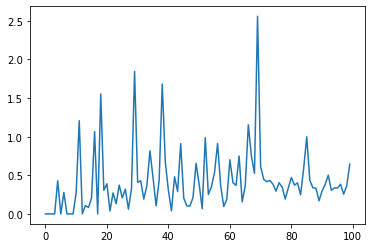

In [31]:
# initialize results vector
avediffs = np.zeros(100)

# loop over matrix sizes
for n in range(1,101):
    
    # create matrices
    A = np.random.randn(n,n)
    B = np.random.randn(n,n)
    
    # GED
    l1 = eig(A,B)[0]
    l2 = eig(np.linalg.inv(B)@A)[0]

    # important to sort eigvals
    l1.sort()
    l2.sort()
    
    # their differences
    avediffs[n-1] = np.mean(np.abs(l1-l2))
    
    
# visualize
plt.plot(avediffs)
plt.show()

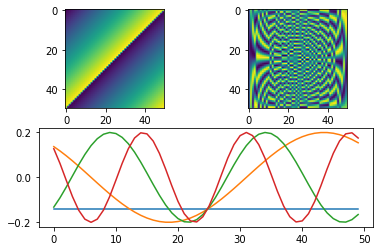

In [37]:
# create the hankel matrix
t = np.arange(1,51)
lstrow = np.append(t[-1],np.arange(1,t[-1]))
H = hankel(t,r=lstrow)

# eigendecomposition
d,V = np.linalg.eig(H)
V = V[:,np.argsort(d)[::-1]]


# the matrix
plt.subplot(221) 
plt.imshow(H)

# the eigenvectors
plt.subplot(222) 
plt.imshow(V)

# some evecs
plt.subplot(212) 
plt.plot(V[:,:4])

plt.show()

## 4.2. SVD

In [107]:
import numpy as np
from scipy import linalg
A = np.array([[1,2,3],[-1,5,6],[2,3,1],[3,-2,2]])
A

array([[ 1,  2,  3],
       [-1,  5,  6],
       [ 2,  3,  1],
       [ 3, -2,  2]])

In [108]:
m,n = A.shape
U,s,Vt = linalg.svd(A)
Sig = linalg.diagsvd(s,m,n)
U.shape,  s.shape, Vt.shape

((4, 4), (3,), (3, 3))

In [109]:
print(U)
print(Sig)
print(Vt)

[[-0.39889953 -0.23698421 -0.0405507  -0.88491428]
 [-0.86268939  0.19596266  0.33821136  0.32090298]
 [-0.30968347 -0.15808665 -0.91053892  0.22365965]
 [-0.02724569 -0.9383207   0.23428101  0.25283265]]
[[9.01518058 0.         0.        ]
 [0.         4.33688954 0.        ]
 [0.         0.         2.63019166]
 [0.         0.         0.        ]]
[[-0.02632384 -0.66396951 -0.74729616]
 [-0.8218061   0.43999883 -0.36198864]
 [-0.56915885 -0.60460361  0.55723665]]


In [112]:
linalg.norm(Vt,axis=1)  # 행벡터 norm

array([1., 1., 1.])

In [113]:
U@Sig@Vt #check computation

array([[ 1.,  2.,  3.],
       [-1.,  5.,  6.],
       [ 2.,  3.,  1.],
       [ 3., -2.,  2.]])

In [117]:
U_r,s_r,Vt_r = linalg.svd(A,full_matrices=False)  # Reduced SVD
print(U_r)
print(np.diag(s_r))
print(Vt_r)

[[-0.39889953 -0.23698421 -0.0405507 ]
 [-0.86268939  0.19596266  0.33821136]
 [-0.30968347 -0.15808665 -0.91053892]
 [-0.02724569 -0.9383207   0.23428101]]
[[9.01518058 0.         0.        ]
 [0.         4.33688954 0.        ]
 [0.         0.         2.63019166]]
[[-0.02632384 -0.66396951 -0.74729616]
 [-0.8218061   0.43999883 -0.36198864]
 [-0.56915885 -0.60460361  0.55723665]]


In [121]:
# matrix
A = np.random.randn(4,5)

# get V
L2,V = np.linalg.eig(A.T@A) 
# sort by descending eigenvalues
V = V[:,np.argsort(L2)[::-1]]

# get U
L2,U = np.linalg.eig(A@A.T) 
# sort by descending eigenvalues
U = U[:,np.argsort(L2)[::-1]]

# create Sigma
S = np.zeros(A.shape)
for i,s in enumerate(np.sort(L2)[::-1]):
    S[i,i] = np.sqrt(s)

# now get the SVD    
U2,S2,V2 = np.linalg.svd(A)
print(U)
print(U2)
print(np.diag(S),np.diag(S2))
print(V)
print(V2)

[[ 0.6619048  -0.65567051 -0.18596074  0.31208463]
 [-0.21521491 -0.37742691  0.88077509  0.18832607]
 [ 0.64164605  0.63274052  0.38554437  0.19820525]
 [ 0.3222653  -0.16518034  0.20250773 -0.90986326]]
[[ 0.6619048  -0.65567051  0.18596074 -0.31208463]
 [-0.21521491 -0.37742691 -0.88077509 -0.18832607]
 [ 0.64164605  0.63274052 -0.38554437 -0.19820525]
 [ 0.3222653  -0.16518034 -0.20250773  0.90986326]]
[3.77585469 2.52876007 1.352822   0.27762748] [[3.77585469 0.         0.         0.        ]
 [0.         2.52876007 0.         0.        ]
 [0.         0.         1.352822   0.        ]
 [0.         0.         0.         0.27762748]]
[[-0.17502211 -0.85048944  0.45422451 -0.09012069  0.17774515]
 [-0.47679177  0.23442968  0.15273603 -0.81906224 -0.15336586]
 [-0.08578482 -0.25610654 -0.76760095 -0.26351192  0.51807399]
 [-0.0991214   0.39442434  0.39903487  0.09209057  0.81663633]
 [-0.85138286  0.02343772 -0.14802624  0.49304777 -0.09792865]]
[[-0.17502211 -0.47679177 -0.08578482 -

In [96]:
# a matrix
A = np.random.randn(5,5)

# its singular values
s = linalg.svd(A)[1]

# "manual" condition number
condnum = np.max(s)/np.min(s)

# compare above with numpy's cond()
print(condnum,np.linalg.cond(A))

9.594913819774655 9.594913819774659


## 4.3. SVD application

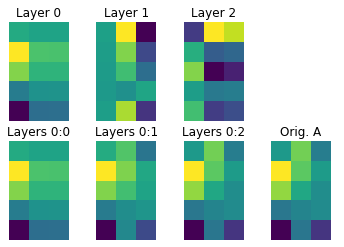

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from scipy.linalg import eig
# setup the figure
fig,ax = plt.subplots(2,4)

# create the matrix and get its SVD
A = np.random.randn(5,3)
U,s,V = np.linalg.svd(A)
S = np.diag(s) # need Sigma as matrix

# loop over layers
for i in range(3):
    
    # compute and show one layer
    onelayer = np.outer(U[:,i],V[i,:])*s[i]
    ax[0,i].imshow(onelayer)
    ax[0,i].set_title('Layer %g'%i)
    ax[0,i].axis('off')
    
    # compute the low-rank approximation up to this layer
    lowrank = U[:,:i+1]@S[:i+1,:i+1]@V[:i+1,:]
    ax[1,i].imshow(lowrank)
    ax[1,i].set_title('Layers 0:%g'%i)
    ax[1,i].axis('off')
    

# finally, show the original matrix
ax[1,3].imshow(A)
ax[1,3].set_title('Orig. A')
ax[1,3].axis('off')
ax[0,3].axis('off')
plt.show()

In [124]:
# matrix sizes
m = 6
n = 16

# desired condition number
condnum = 42

# create U and V from random numbers
U,r = np.linalg.qr( np.random.randn(m,m) )
V,r = np.linalg.qr( np.random.randn(n,n) )

# create singular values vector
s = np.linspace(condnum,1,np.min((m,n)))
S = np.zeros((m,n))
for i in range(min((m,n))):
    S[i,i] = s[i]

# construct matrix
A = U@S@V.T 

# confirm!
np.linalg.cond(A)

41.99999999999997

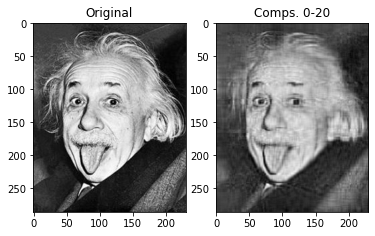

In [125]:
# download picture and convert to float
pic = imread('https://upload.wikimedia.org/wikipedia/en/8/86/Einstein_tongue.jpg')
np.array(pic,dtype=float)

# SVD and create sigma matrix
U,s,V = np.linalg.svd( pic )
S = np.zeros(pic.shape)
for i in range(len(s)):
    S[i,i] = s[i]

# number of components to use
comps = slice(0,21) 

# create the low-rank approx.
lowrank = U[:,comps]@S[comps,comps]@V[comps,:]


# show the original and low-rank
plt.subplot(1,2,1)
plt.imshow(pic,cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(lowrank,cmap='gray')
plt.title('Comps. %g-%g'%(comps.start,comps.stop-1));

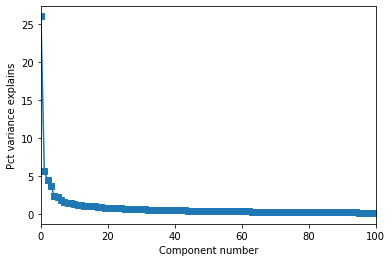

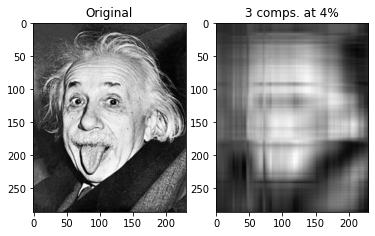

In [126]:
# convert to percent explained
s = 100*s/np.sum(s)

# visualize
plt.plot(s,'s-')
plt.xlim([0,100])
plt.xlabel('Component number')
plt.ylabel('Pct variance explains')
plt.show()


# threshold in percent
thresh = 4 
I,J=np.ix_(s>thresh,s>thresh) # comps > X%
lowrank = np.squeeze(U[:,J]@S[I,J]@V[J,:])


# show the original and low-rank
plt.subplot(1,2,1)
plt.imshow(pic,cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(lowrank,cmap='gray')
plt.title('%g comps. at %g%%'%(len(I),thresh));

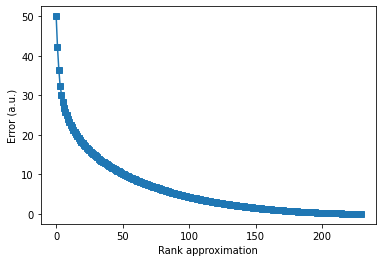

In [127]:
# initialize RMS vector
RMS = np.zeros(len(s))

# loop through singular values (SVD layers)
for si in range(len(s)):
    
    # create the low-rank img
    i = si+1 # mind the indexing!
    lowrank = U[:,:i]@S[:i,:i]@V[:i,:]
    
    # get the difference
    diffimg = lowrank - pic
    
    # compute RMS for this rank
    RMS[si] = np.sqrt(np.mean(diffimg.flatten()**2))

    
# how's it look?!?
plt.plot(RMS,'s-')
plt.xlabel('Rank approximation')
plt.ylabel('Error (a.u.)')
plt.show()

### Moore-Penrose pseudo-inverse

In [156]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
# some random tall matrix  with m>n
M = np.random.randint(low=1,high=7,size=(5,2))
print(X)
U,s,V = np.linalg.svd(M) 
m,n=M.shape
S=linalg.diagsvd(s,m,n)
Spinv=linalg.diagsvd(1/s,m,n)

Mpinv1 = np.linalg.inv( V.T@V ) @ (U@Spinv@V).T
print(Xpinv1)
# 유사 역행렬 pinv을 계산합니다.
Mpinv = np.linalg.pinv(X)
print(Xpinv)
Mpinv1 - Mpinv

[[1 3]
 [5 3]
 [6 6]
 [3 5]
 [2 4]]
[[-0.11371237  0.20401338  0.090301   -0.08361204 -0.09866221]
 [ 0.12374582 -0.13377926 -0.01003344  0.12040134  0.12207358]]
[[-0.11371237  0.20401338  0.090301   -0.08361204 -0.09866221]
 [ 0.12374582 -0.13377926 -0.01003344  0.12040134  0.12207358]]


array([[ 0.15588817, -0.03806935, -0.11119182,  0.09307203,  0.04505559],
       [-0.11467999, -0.00812062,  0.08965505, -0.0809847 , -0.01210117]])

In [157]:
np.allclose(M, np.dot(M, np.dot(Mpinv, M)))

False

In [158]:
np.allclose(Mpinv, np.dot(Mpinv, np.dot(M, Mpinv)))

False

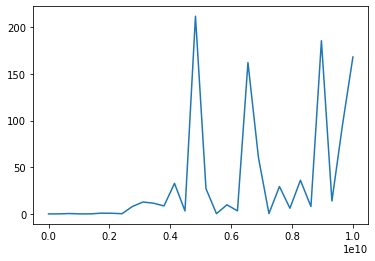

In [160]:
# matrix size
M = 10 

# condition numbers
cns = np.linspace(10,1e10,30)

# results vector
avediffs = np.zeros(len(cns))

# loop over condition numbers
for condi in range(len(cns)):
    
    # create A
    U,r = np.linalg.qr( np.random.randn(M,M) )
    V,r = np.linalg.qr( np.random.randn(M,M) )
    S = np.diag(np.linspace(cns[condi],1,M))
    A = U@S@V.T # construct matrix  
  
    # create B
    U,r = np.linalg.qr( np.random.randn(M,M) )
    V,r = np.linalg.qr( np.random.randn(M,M) )
    S = np.diag(np.linspace(cns[condi],1,M))
    B = U@S@V.T # construct matrix
  
    # GEDs and sort
    l1 = eig(A,B)[0]
    l2 = eig(np.linalg.inv(B)@A)[0]
    l1.sort()
    l2.sort()
  
    # get differences
    avediffs[condi] = np.mean(np.abs(l1-l2))

# plot them!
plt.plot(cns,avediffs)
plt.show()